In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import BaggingClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification

c:\Users\Khushi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
x, y = make_classification(
    n_samples=100,       # Fixed number of samples
    n_features=2,        # Fixed number of features
    n_classes=3,         # Number of classes
    n_informative=2,     # All features are informative
    n_redundant=0,       # No redundant features
    n_clusters_per_class=1,  # Adjusted to satisfy the condition
    flip_y=0.03,         # Add slight label noise
    class_sep=1.5,       # Enhance separability
    random_state=42
)

In [3]:
df = pd.DataFrame(x,columns=['feature1','feature2'])
df['target'] = y

In [4]:
df.head()

,feature1,feature2,target
0,-1.426315,-1.449498,2
1,-1.176214,1.912767,0
2,-1.810385,1.056563,0
3,-1.000234,-1.251066,2
4,-1.135331,-1.306694,0


In [5]:
df_train = df.iloc[:60,:].sample(20)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [6]:
x_test = df_val.drop(columns=['target'])
y_test = df_val['target']

Evaluate

In [7]:
def evaluate(clf,x,y):
    clf.fit(x,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(x.values,y.values,clf=clf)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print(acc)
    return acc

In [8]:
acc = []

Bagging

1st

In [9]:
df_bag = df_train.sample(15,replace=True)
x = df_bag.drop(columns=['target'])
y = df_bag['target']
df_bag

,feature1,feature2,target
44,2.307731,2.339463,1
7,1.626256,1.658900,1
58,2.795191,2.814148,1
34,2.033921,1.988289,1
44,2.307731,2.339463,1
7,1.626256,1.658900,1
37,1.334343,1.306865,1
46,0.620544,0.512581,1
7,1.626256,1.658900,1
34,2.033921,1.988289,1


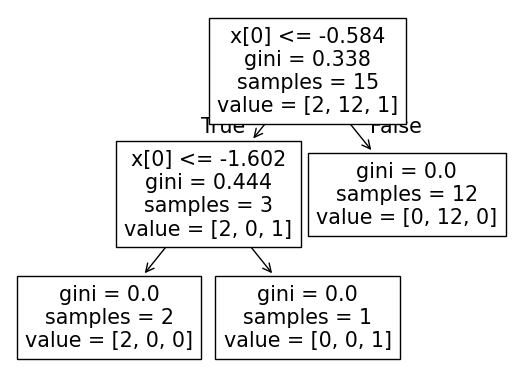

0.6


c:\Users\Khushi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


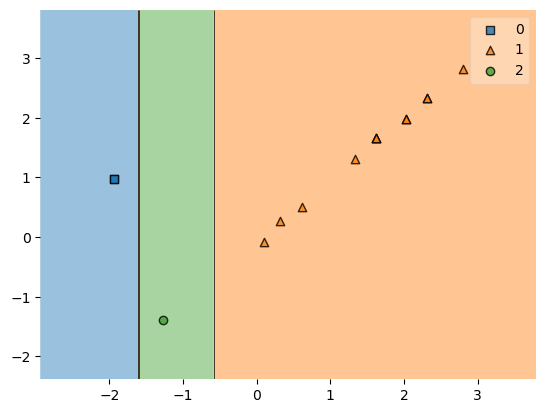

In [10]:
dt1 = DecisionTreeClassifier()
acc.append(evaluate(dt1,x,y))

2nd

In [11]:
df_bag = df_train.sample(15,replace=True)
x = df_bag.drop(columns=['target'])
y = df_bag['target']
df_bag

,feature1,feature2,target
34,2.033921,1.988289,1
59,-1.266195,-1.383907,2
29,-1.560967,1.269169,0
12,-1.709907,-1.598971,2
39,-2.422953,-1.956913,2
15,0.315464,0.274494,1
27,-0.715011,-1.107262,2
34,2.033921,1.988289,1
34,2.033921,1.988289,1
2,-1.810385,1.056563,0


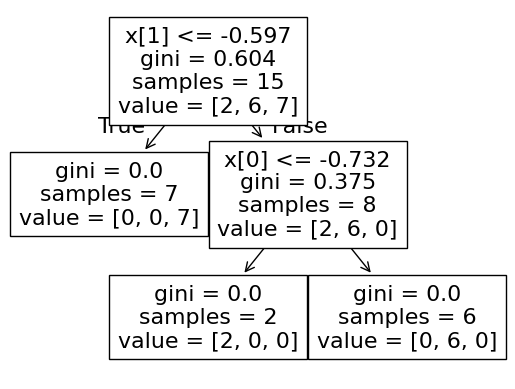

1.0


c:\Users\Khushi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


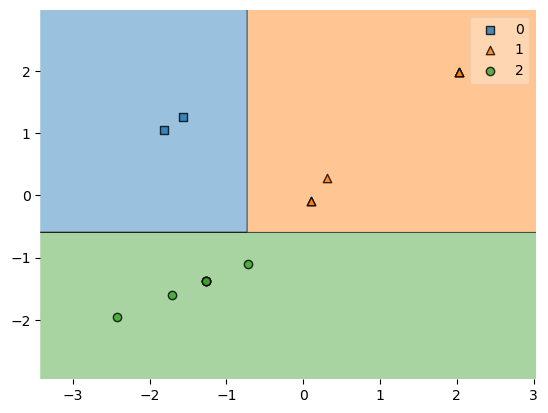

In [12]:
dt2 = DecisionTreeClassifier()
acc.append(evaluate(dt2,x,y))

3rd

In [13]:
df_bag = df_train.sample(15,replace=True)
x = df_bag.drop(columns=['target'])
y = df_bag['target']
df_bag

,feature1,feature2,target
56,1.190414,1.232546,1
56,1.190414,1.232546,1
45,-2.180565,-1.842632,2
45,-2.180565,-1.842632,2
2,-1.810385,1.056563,0
9,0.182962,0.047237,1
34,2.033921,1.988289,1
44,2.307731,2.339463,1
56,1.190414,1.232546,1
15,0.315464,0.274494,1


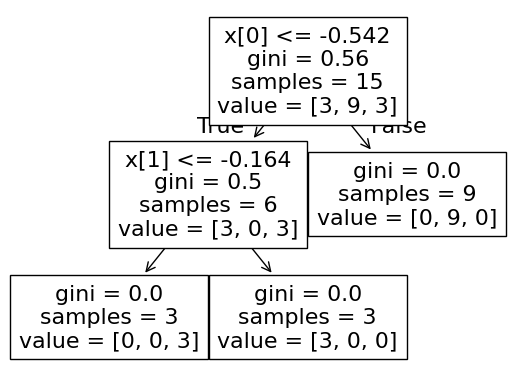

0.8


c:\Users\Khushi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


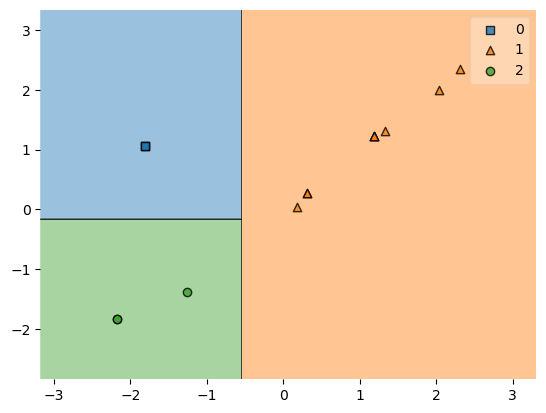

In [14]:
dt3 = DecisionTreeClassifier()
acc.append(evaluate(dt3,x,y))

Avg

In [15]:
np.mean(acc)

0.8000000000000002